<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Droupout_Regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [87]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate Data:

In [88]:
X_train = np.linspace(-1,1,20)

In [89]:
X_train.shape

(20,)

In [90]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [91]:
X_test  = np.linspace(-1,1,20)

In [92]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

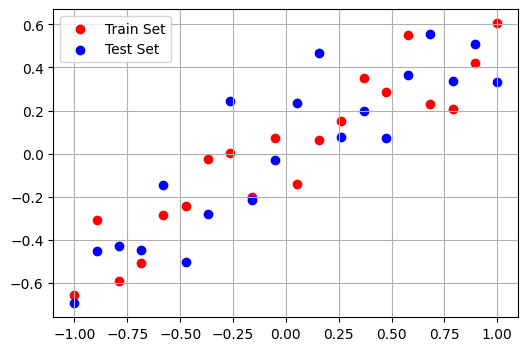

In [93]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,c='red',label='Train Set')
plt.scatter(X_test,y_test,c='blue',label='Test Set')
plt.grid()
plt.legend()
plt.show()

# Regression Model:

In [94]:
model_1 = Sequential()
model_1.add(Dense(128,activation='relu',input_dim=1))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='linear'))  # As we know for the output layer in regression activation function is linear
adam = Adam(learning_rate=0.01)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Fit the model:

In [96]:
model_1.compile(optimizer=adam,loss="mse",metrics=['mean_squared_error','accuracy'])

In [97]:

history =  model_1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=0)

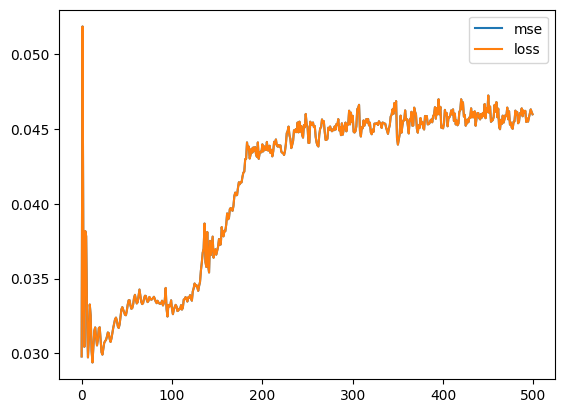

In [98]:
plt.plot(history.history['val_mean_squared_error'],label="mse")
plt.plot(history.history['val_loss'],label="loss")
plt.legend()
plt.show()

# Early stopping to Get best Number of epochs:

In [113]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(
    monitor = "val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode = "auto",
    baseline=None,
    restore_best_weights=True
)

In [114]:
history =  model_1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=ES)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.0000e+00 - loss: 0.0044 - mean_squared_error: 0.0044 - val_accuracy: 0.0000e+00 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 0.0044 - mean_squared_error: 0.0044 - val_accuracy: 0.0000e+00 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0000e+00 - loss: 0.0044 - mean_squared_error: 0.0044 - val_accuracy: 0.0000e+00 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: 0.0045 - mean_squared_error: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0000e+00 - loss: 0.0046 - mean_squared_error: 0.0046 - val_accuracy: 0.0000e+00 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 6/500
1/1 ━━

# Evaluate the model:

In [115]:
# evaluate the model
_, train_mse, _ = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse, _ = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004493665881454945, Test: 0.04501231387257576


In [116]:
y_pred_1  = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


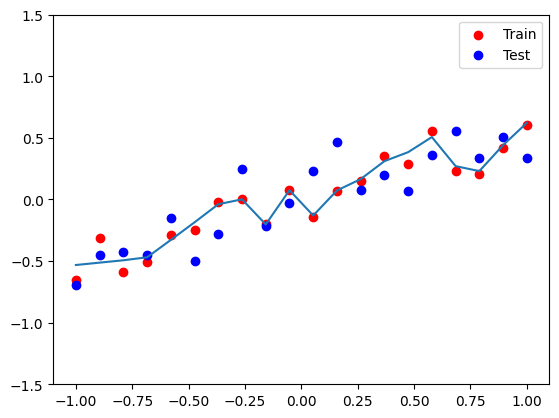

In [118]:
plt.figure()
plt.scatter(X_train,y_train,c="red",label="Train")
plt.scatter(X_test,y_test,c="blue",label="Test")
plt.plot(X_test,y_pred_1)
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()


# Droput Model:

In [105]:
# Will Create Droupout Between Models as it will behabe as different NN in diff epochs:
Model = Sequential()
Model.add(Dense(128,input_dim=1,activation="relu"))
Model.add(Dropout(0.2))
Model.add(Dense(128,activation="relu"))
Model.add(Dropout(0.2))
Model.add(Dense(1,activation="linear"))
adam = Adam(learning_rate=0.02)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
Model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Fit the Model:

In [108]:
Model.compile(optimizer="adam",loss='mse',metrics=['mse','accuracy'])
drop_out_history  = Model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=0)

In [110]:
# evaluate the model
_, train_mse, _ = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse, _ = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.00435252720490098, Test: 0.045988570898771286


In [111]:
y_pred = Model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


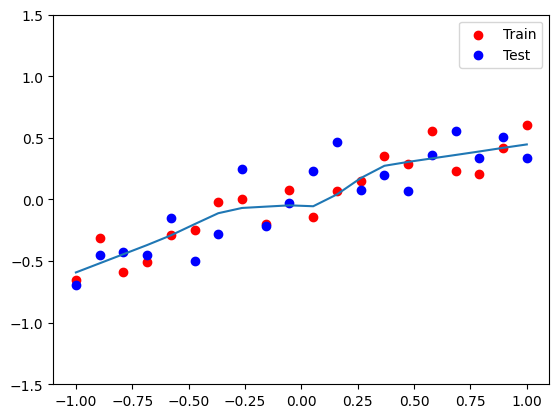

In [112]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Let's try this while using early stopping:

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(
    monitor = "val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode = "auto",
    baseline=None,
    restore_best_weights=True
)

In [120]:
history =  Model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=ES)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.0000e+00 - loss: 0.0168 - mse: 0.0168 - val_accuracy: 0.0000e+00 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.0000e+00 - loss: 0.0120 - mse: 0.0120 - val_accuracy: 0.0000e+00 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.0000e+00 - loss: 0.0112 - mse: 0.0112 - val_accuracy: 0.0000e+00 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: 0.0140 - mse: 0.0140 - val_accuracy: 0.0000e+00 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: 0.0172 - mse: 0.0172 - val_accuracy: 0.0000e+00 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0000e+00 - loss: 0.0145 - mse: 0.0145 - val_accuracy: 0.0000e+00 - val_loss: 0.0337 - val_mse: 0.0337
Ep

In [121]:
y_pred_2 = Model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


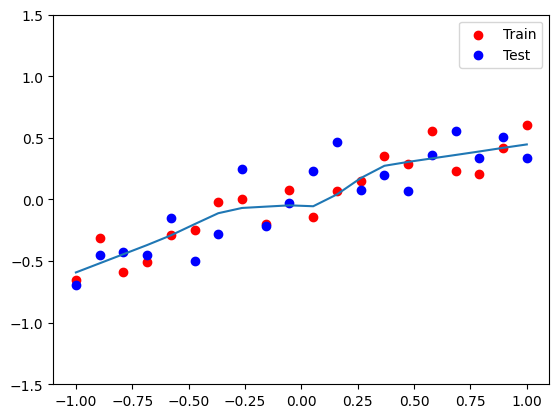

In [122]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

**This is the reason we use early stopping saved us computation for nearly 450 epochs as only 30 epochs were required but  we get the best value at the 9th so we can set our patience at 5 to get more better computational capacity and Directory Access. **